In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

import utils
import importlib
importlib.reload(utils)

import os
import sys
import subprocess

In [2]:
train, test, info, index = utils.ReadData("train_big_cleaned")

In [3]:
val = train.values[:, -60:]
train_for_val = train.values[:, :-60]

In [14]:
data = train_for_val
# data = np.log1p(data)

# Finding rows with many zeros

In [19]:
data_with_zeros = data[((data[:, -50:] == 0 ).sum(axis=1) > 5)]

In [22]:
# % of pages with many zeros
((data[:, -50:] == 0 ).sum(axis=1) > 5).mean()

0.03708044091187967

In [29]:
index_many_zeros = np.argwhere((data[:, -50:] == 0 ).sum(axis=1) > 5).squeeze(1)

In [30]:
# np.save("models/index_many_zeros", index_many_zeros)

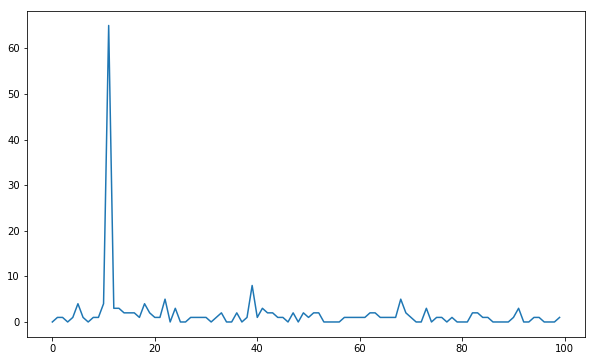

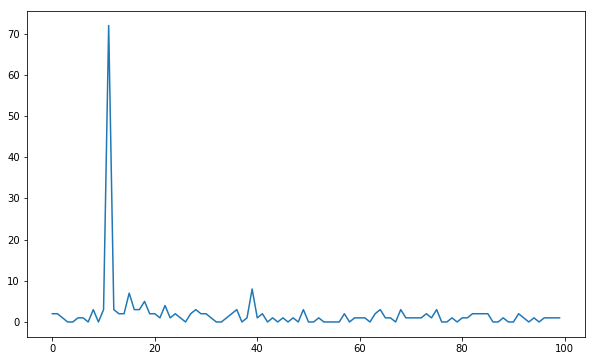

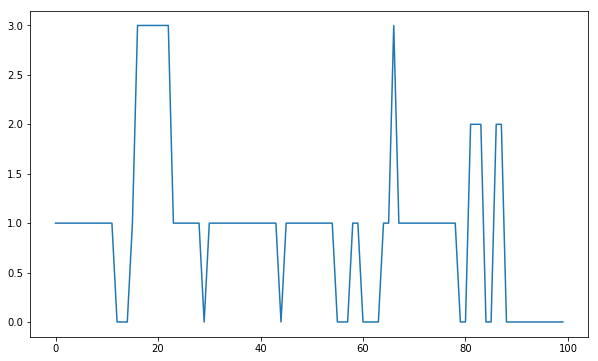

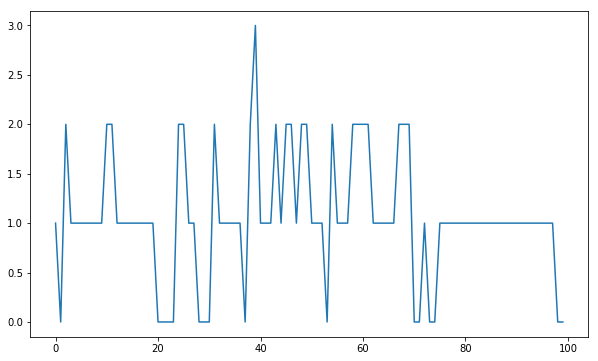

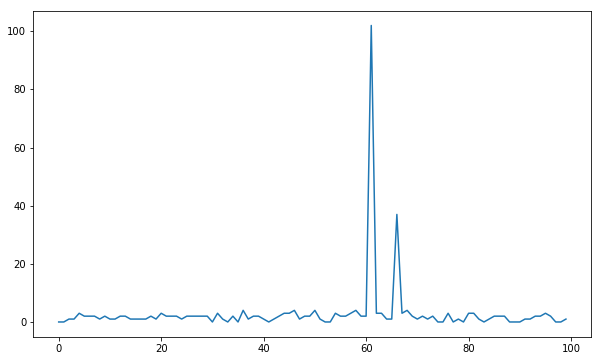

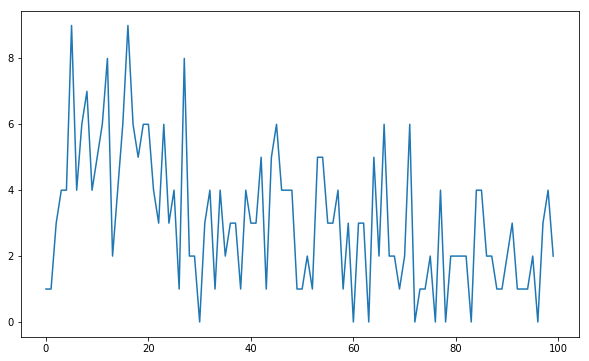

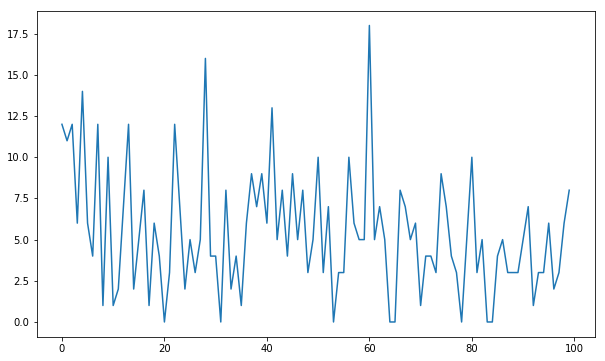

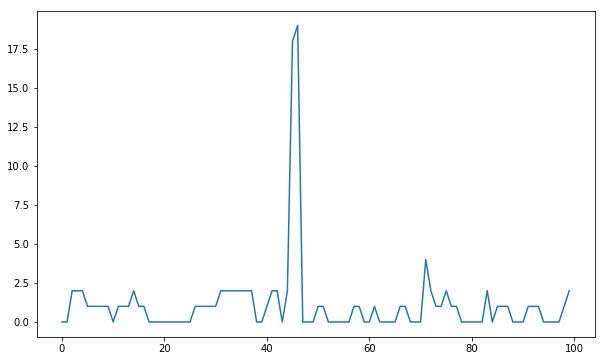

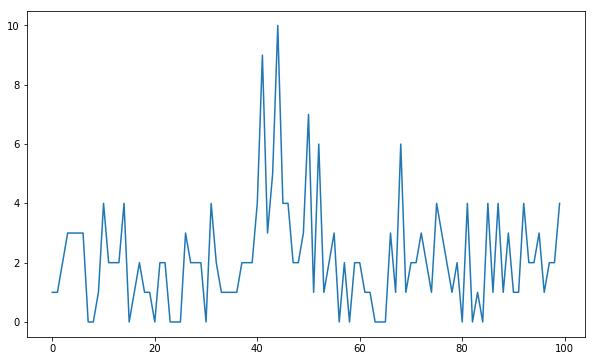

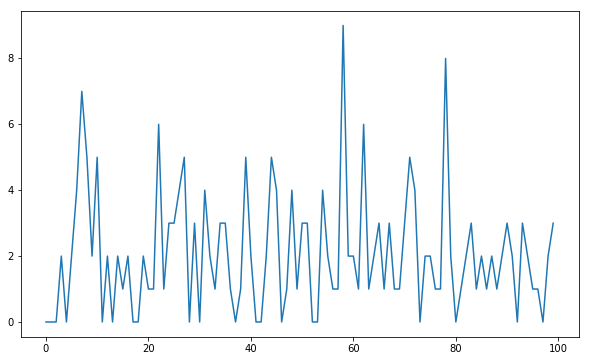

In [21]:
for i in range(10):
    plt.plot(data_with_zeros[i, -100:])
    plt.show()

# Finding rows with seasonality

## Weekly

In [15]:
dy = np.diff(data)
season_days = 7

# 682

n_days = 90 - season_days
dy1 = dy[:, -n_days:]
dy2 = dy[:, (-season_days - n_days) : -season_days]

In [16]:
dy1.shape

(145063, 83)

In [32]:
assert dy2.shape == dy1.shape

In [33]:
def corr_coef(x, y):
    mean_x = np.mean(x, axis=1).reshape(-1, 1)
    mean_y = np.mean(y, axis=1).reshape(-1, 1)
    x = x - mean_x
    y = y - mean_y
    
    answer = x * y
    answer = answer.mean(axis=1)
    
    std = x.std(axis=1) * y.std(axis=1)
    
    return (answer.T / std.T).T

In [34]:
corr = corr_coef(dy1, dy2)

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


/home/shirobokov/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shirobokov/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        8.0000e+00, 1.0000e+01, 4.2000e+01, 7.1000e+01, 1.9000e+02,
        6.6000e+02, 2.0150e+03, 5.1080e+03, 1.1620e+04, 2.6536e+04,
        2.8029e+04, 1.7876e+04, 1.2659e+04, 9.0710e+03, 6.3970e+03,
        4.9780e+03, 3.9680e+03, 3.1790e+03, 2.8200e+03, 2.3250e+03,
        2.1550e+03, 2.1760e+03, 1.4880e+03, 4.4900e+02, 1.1100e+02]),
 array([-1.        , -0.93333334, -0.8666667 , -0.8       , -0.73333335,
        -0.6666667 , -0.6       , -0.53333336, -0.46666667, -0.4       ,
        -0.33333334, -0.26666668, -0.2       , -0.13333334, -0.06666667,
         0.        ,  0.06666667,  0.13333334,  0.2       ,  0.26666668,
         0.33333334,  0.4       ,  0.46666667,  0.53333336,  0.6       ,
         0.6666667 ,  0.73333335,  0.8       ,  0.8666667 ,  0.93333334,
         1.        ], dtype=float32),
 <a list of 30 Patch objects>)

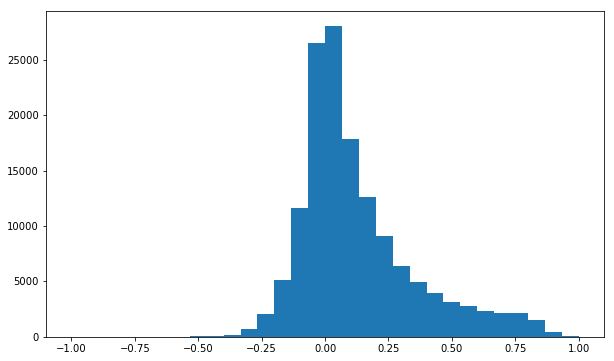

In [41]:
plt.hist(corr, bins=30, range=(-1, 1))

______________________________________________________________________
______________________________________________________________________
______________________________________________________________________
0.3


/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


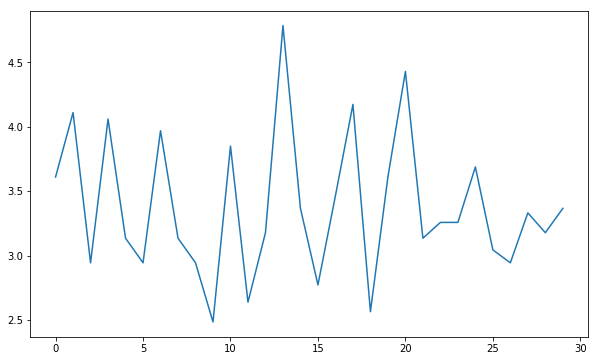

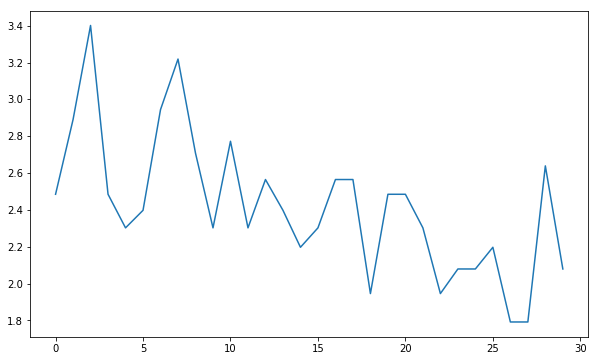

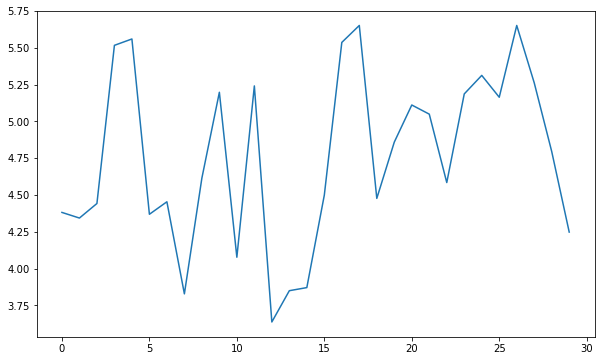

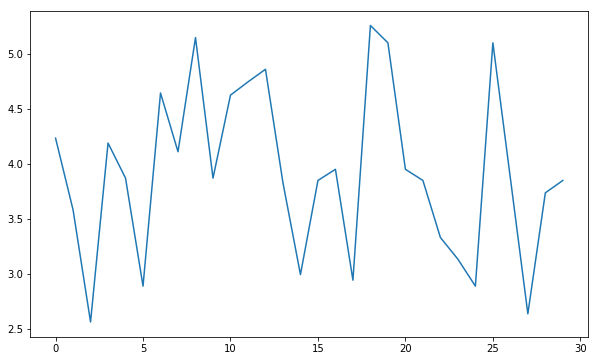

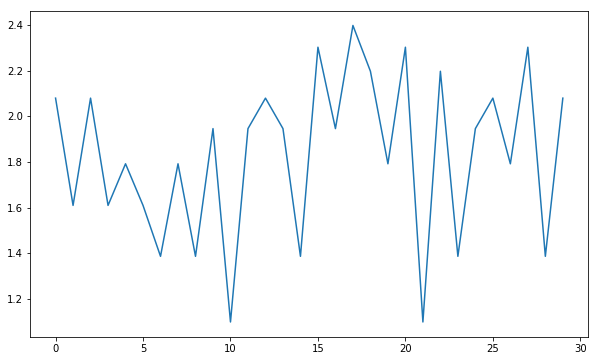

______________________________________________________________________
______________________________________________________________________
______________________________________________________________________
0.4


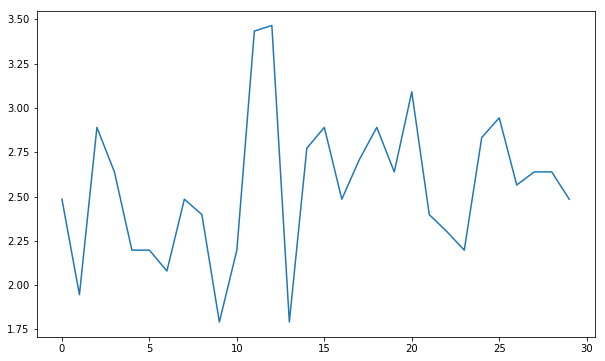

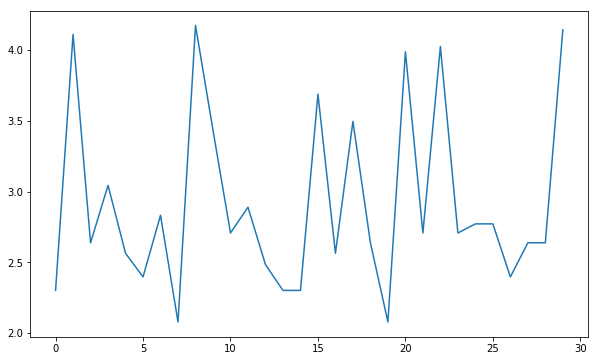

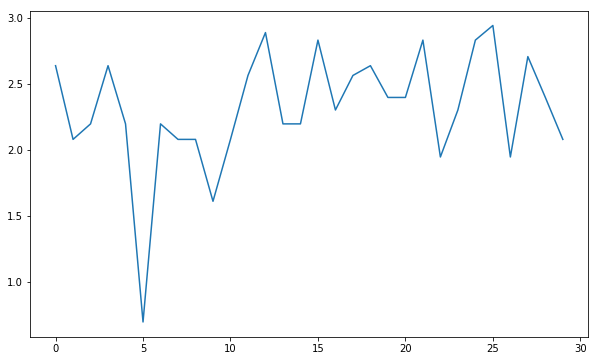

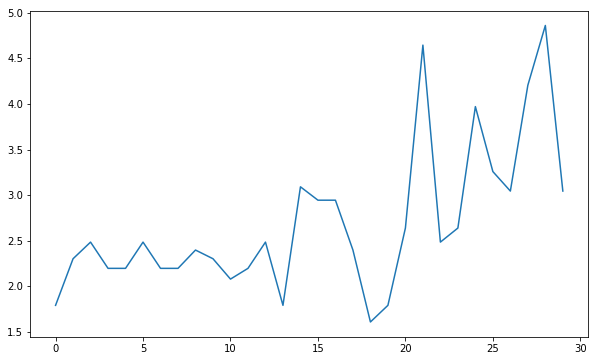

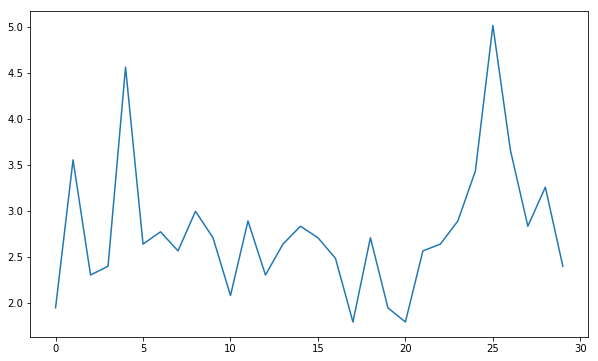

______________________________________________________________________
______________________________________________________________________
______________________________________________________________________
0.5


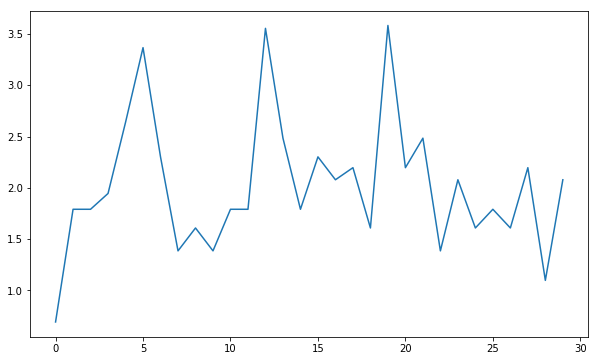

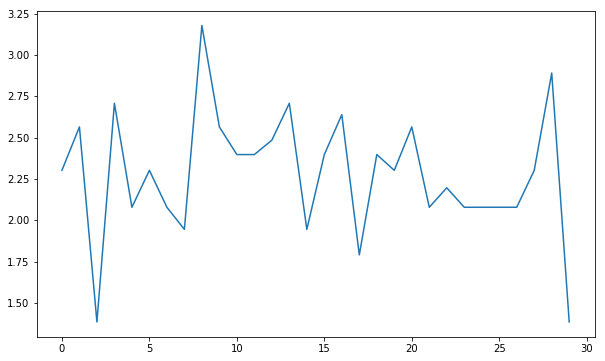

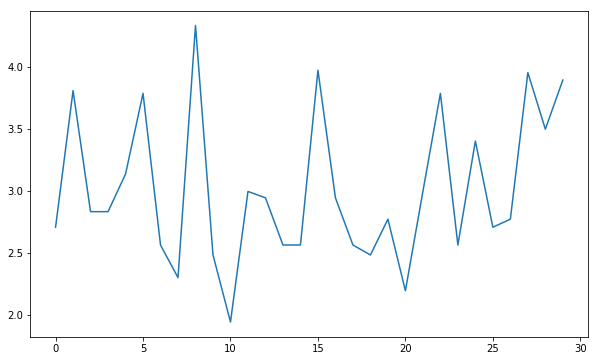

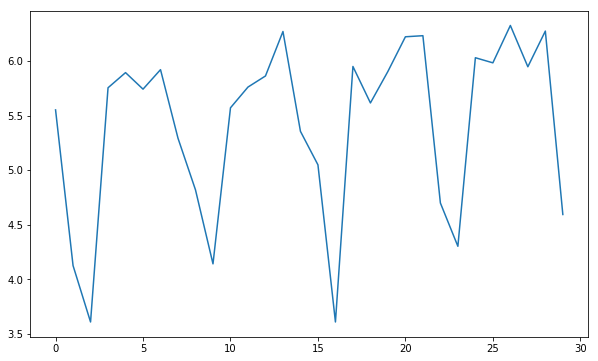

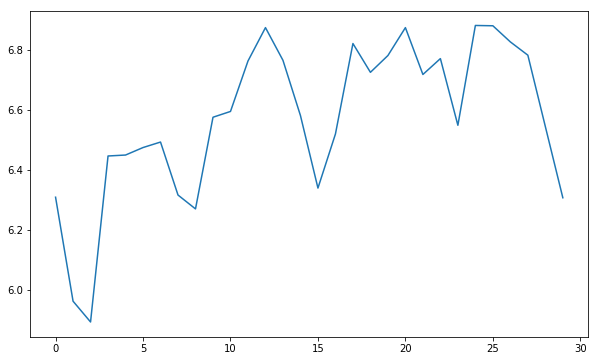

______________________________________________________________________
______________________________________________________________________
______________________________________________________________________
0.6


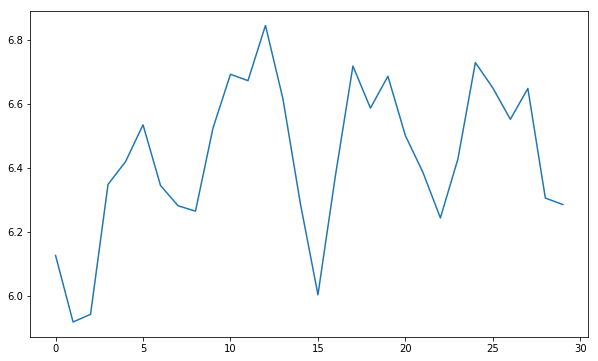

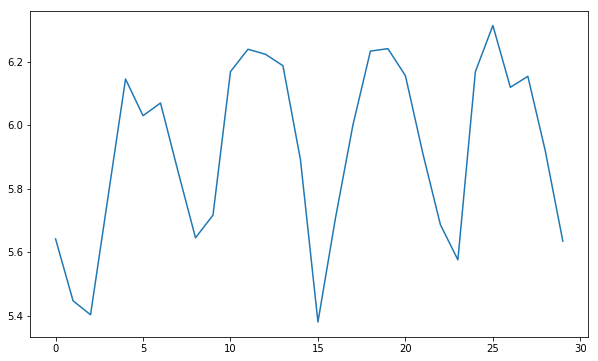

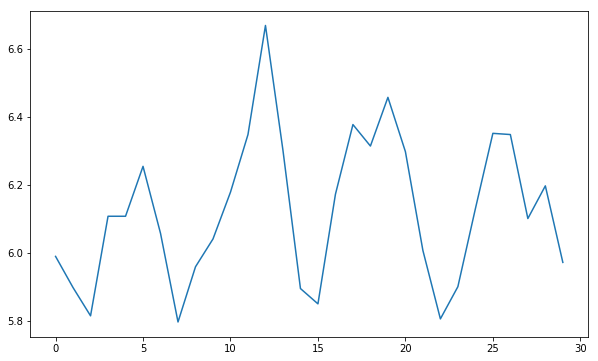

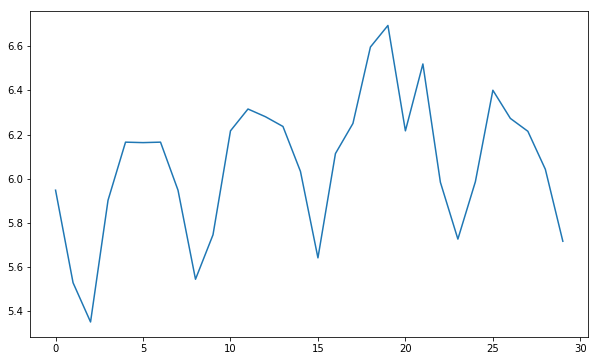

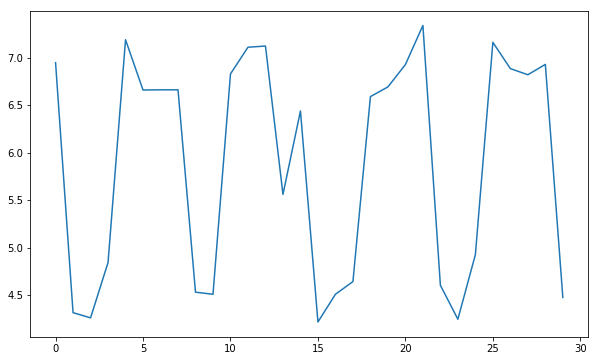

______________________________________________________________________
______________________________________________________________________
______________________________________________________________________
0.7


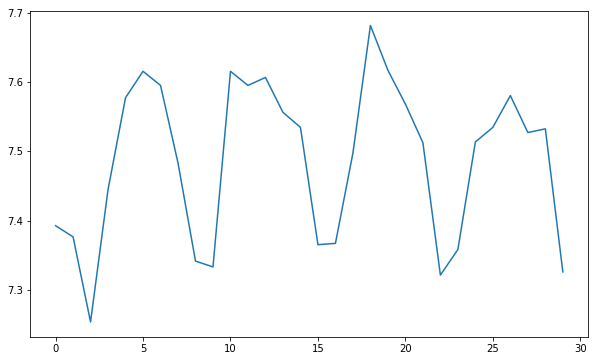

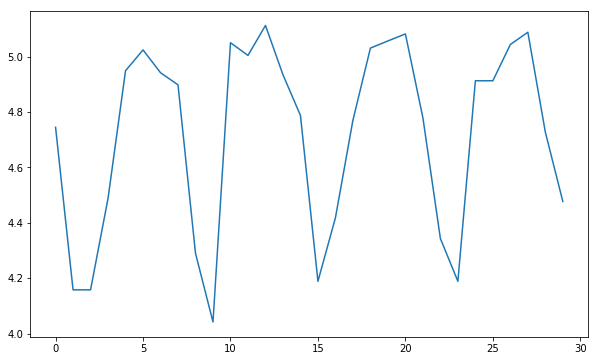

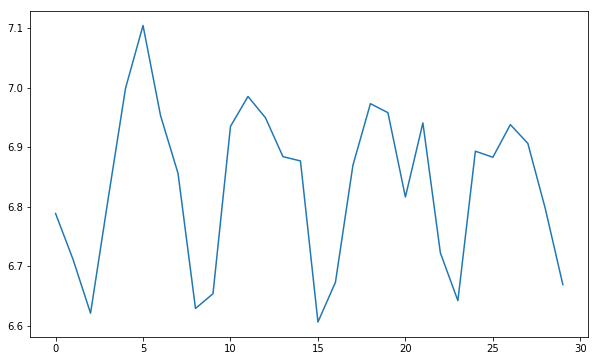

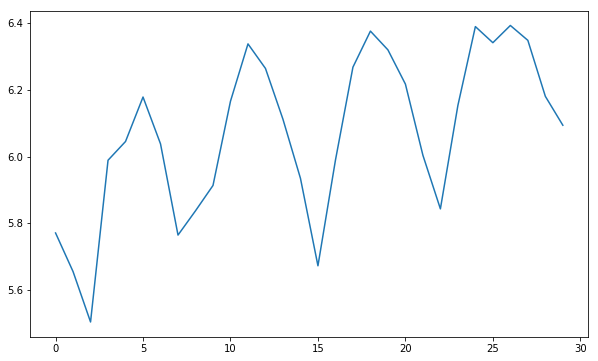

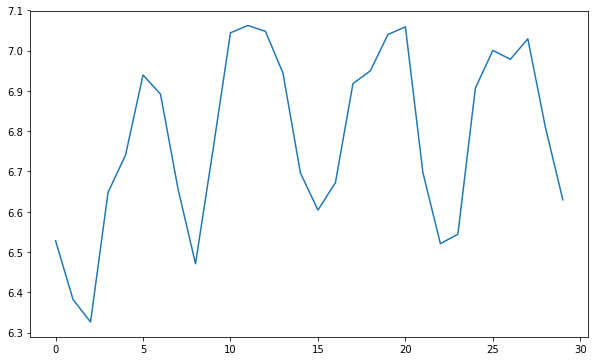

In [283]:
for x in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print("______________________________________________________________________")
    print("______________________________________________________________________")
    print("______________________________________________________________________")
    print(x)
    for i in range(5):
        plt.plot(np.log1p(data[np.logical_and(x < corr, corr < x + 0.1)][i][-30:]))
        plt.show()

In [43]:
(corr > 0.5).mean()

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.08973342616656212

In [44]:
index_weekly = np.argwhere(corr > 0.5).squeeze(1)
# np.save("models/index_weekly", index_weekly)

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [89]:
index_many_zeros[:20]

array([  52,   53,   54,   56,   80,   83,  158,  172,  195,  570,  906,
        913,  937, 1475, 1535, 1714, 1810, 1892, 1937, 2088])

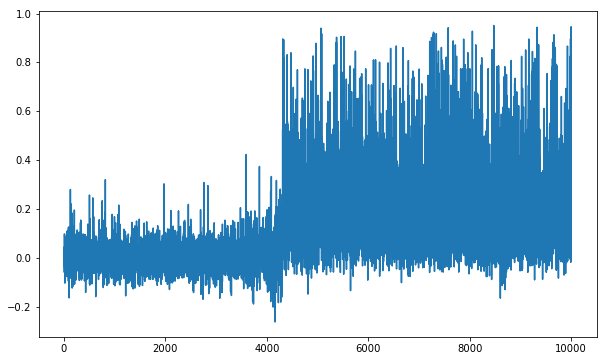

In [222]:
plt.plot(corr)

In [209]:
np.arange(10000)[corr > 0.8]

array([4314, 4330, 4331, 4336, 4400, 4474, 4912, 4967, 5067, 5072, 5080,
       5370, 5374, 5462, 5523, 5745, 6101, 6142, 6221, 6439, 6551, 6683,
       6789, 7210, 7246, 7278, 7285, 7290, 7340, 7382, 7440, 7457, 7536,
       7574, 7671, 7715, 7739, 7879, 7961, 8051, 8117, 8235, 8441, 8471,
       8473, 8816, 9021, 9101, 9162, 9235, 9283, 9326, 9356, 9629, 9638,
       9645, 9646, 9656, 9658, 9659, 9673, 9680, 9681, 9682, 9683, 9685,
       9925, 9983, 9986, 9997])

In [225]:
np.arange(10000)[corr < 0.1]

array([   0,    1,    2, ..., 9985, 9990, 9994])

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


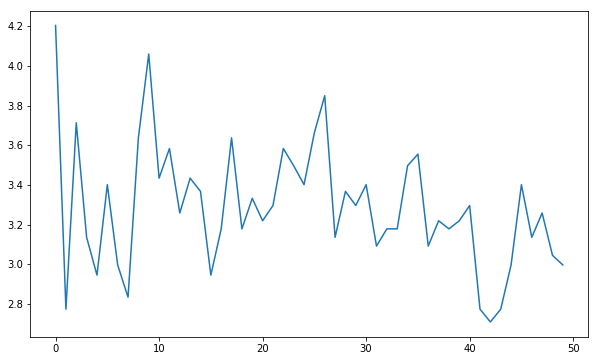

In [227]:
plt.plot(np.log1p(train.ix[0].values[-50:]))

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


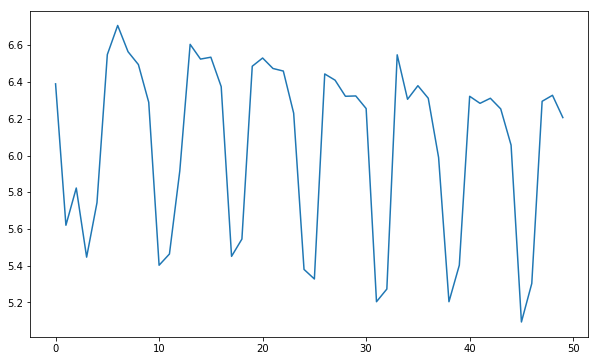

In [229]:
plt.plot(np.log1p(train.ix[4331].values[-50:]))

In [199]:
info.ix[9051].values

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array(['Eq', 'en', 'wikipedia', 'desktop', 'all-agents',
       'Equinox_en.wikipedia.org_desktop_all-agents'], dtype=object)

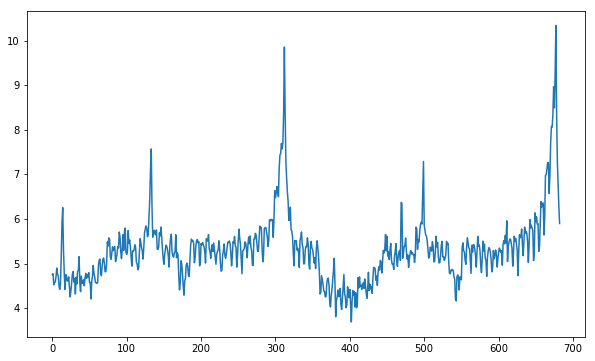

In [176]:
plt.plot(data[:10000][corr > 0.3][1])

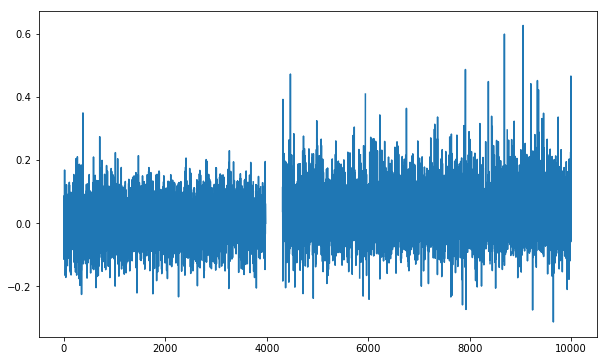

In [169]:
np.array(x)

In [72]:
np.corrcoef(dy1[0], dy2[0])

array([[ 1.        , -0.04944177],
       [-0.04944177,  1.        ]])

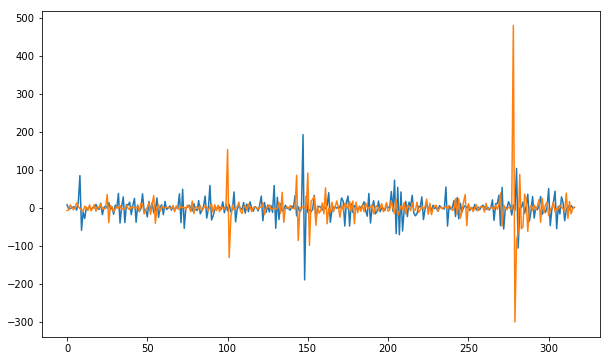

In [69]:
plt.plot(dy1[0])
plt.plot(dy2[0])

In [132]:
R = 0.5 * np.mean(np.abs(dy1 - dy2), axis=1) / np.mean((0.1 + np.abs(dy1) + np.abs(dy1)), axis=1)

In [137]:
corr = R

In [138]:
(corr > 0.8).mean()

0.0010753948284538443

In [141]:
corr.shape

(145063,)

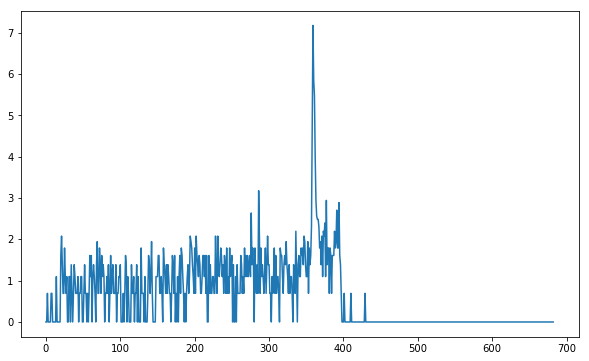

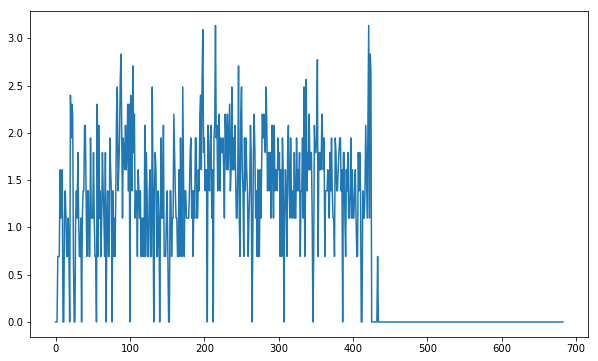

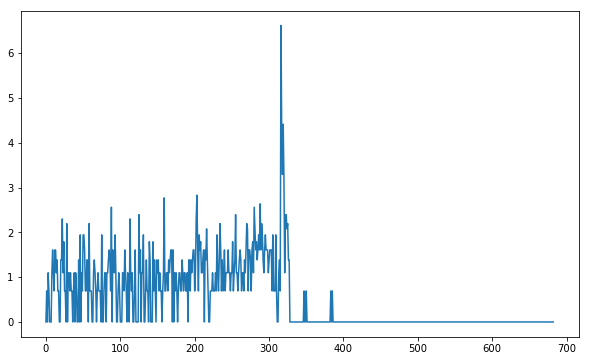

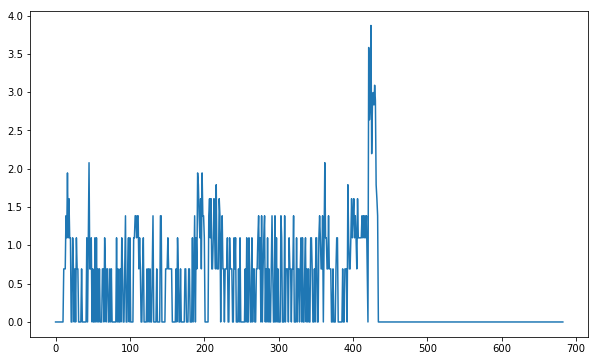

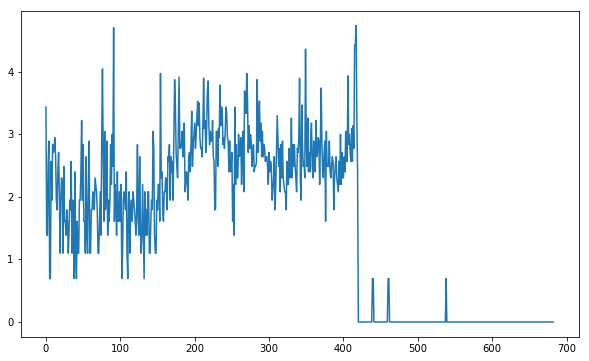

In [140]:
for i in range(5):
    plt.plot(data[corr > 0.9][i])
    plt.show()

## Yearly (no reason to do it)

In [69]:
dy = np.diff(np.log1p(data))
season_days = 365

# 682

n_days = 682 - season_days
dy1 = dy[:, -n_days:]
dy2 = dy[:, (-season_days - n_days) : -season_days]

In [70]:
dy1.shape

(145063, 317)

In [71]:
assert dy2.shape == dy1.shape

In [72]:
corr = corr_coef(dy1, dy2)

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [73]:
corr

array([-0.10085568,  0.01668587, -0.11382331, ...,         nan,
               nan,         nan], dtype=float32)

/home/shirobokov/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shirobokov/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 8.0000e+00, 3.0000e+00, 3.5000e+01,
        8.0000e+01, 3.7300e+02, 2.5500e+03, 1.4372e+04, 4.0140e+04,
        4.5284e+04, 2.2182e+04, 7.2720e+03, 2.8750e+03, 1.8630e+03,
        9.5700e+02, 1.9400e+02, 4.3000e+01, 2.1000e+01, 1.6000e+01,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-1.        , -0.93333334, -0.8666667 , -0.8       , -0.73333335,
        -0.6666667 , -0.6       , -0.53333336, -0.46666667, -0.4       ,
        -0.33333334, -0.26666668, -0.2       , -0.13333334, -0.06666667,
         0.        ,  0.06666667,  0.13333334,  0.2       ,  0.26666668,
         0.33333334,  0.4       ,  0.46666667,  0.53333336,  0.6       ,
         0.6666667 ,  0.73333335,  0.8       ,  0.8666667 ,  0.93333334,
         1.        ], dtype=float32),
 <a list of 30 Patch objects>)

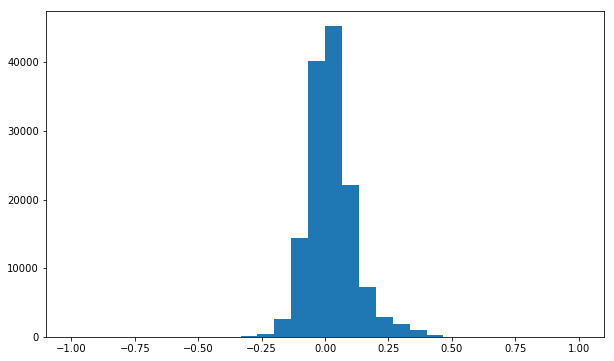

In [74]:
plt.hist(corr, bins=30, range=(-1, 1))

In [76]:
(corr > 0.25).mean()

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.02513390733681228

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


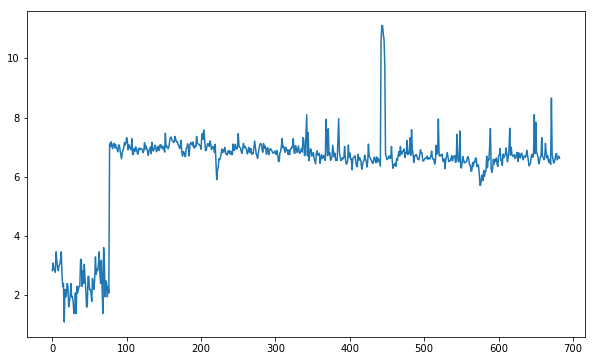

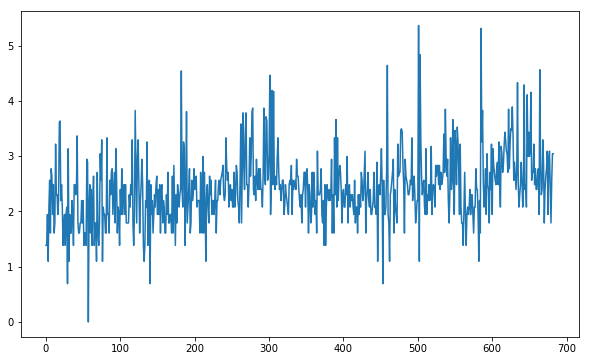

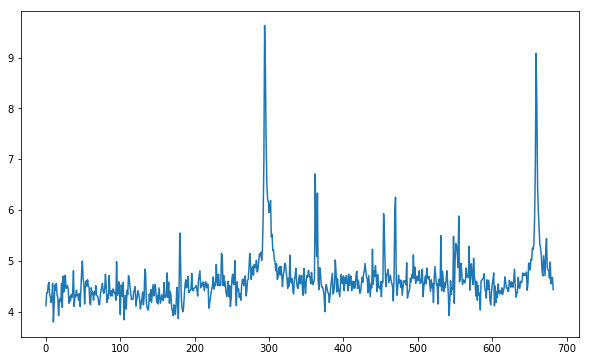

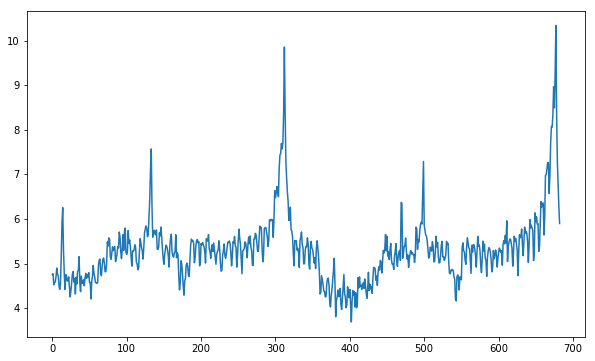

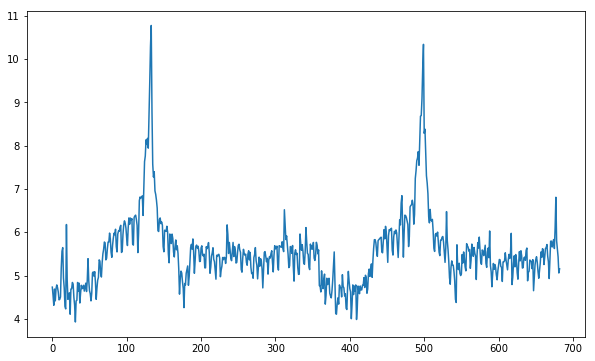

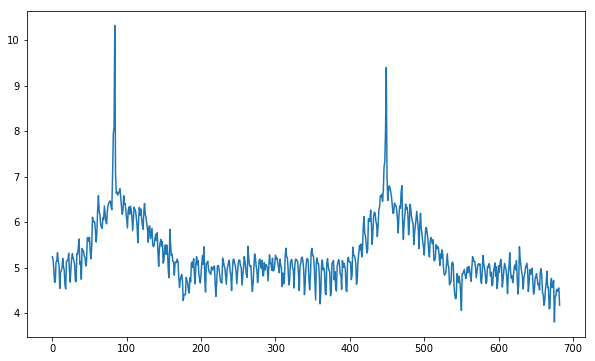

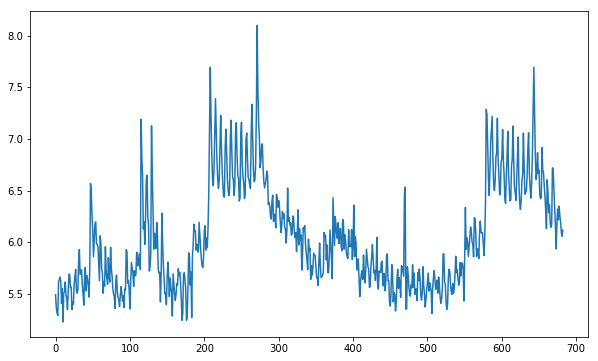

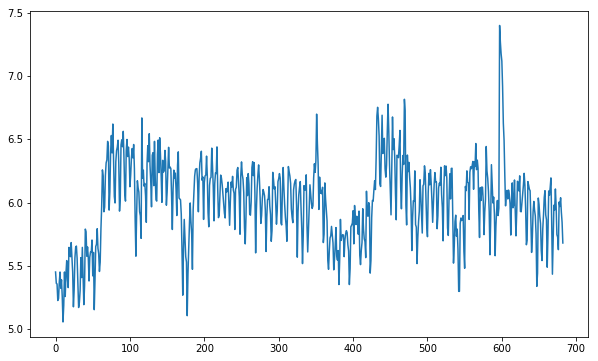

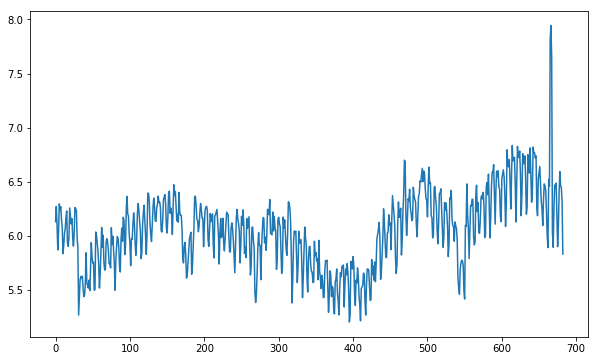

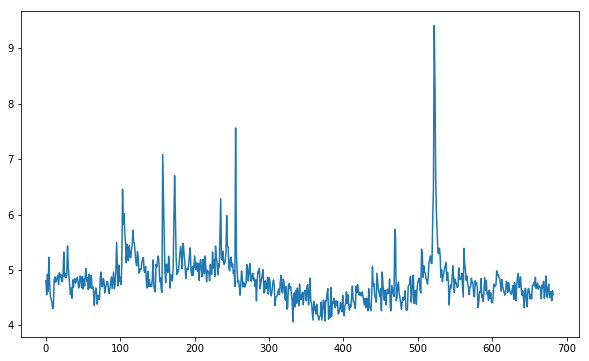

In [77]:
for i in range(10):
    plt.plot(np.log1p(data[(corr > 0.25)][i]))
    plt.show()

In [61]:
np.argwhere(corr > 0.5)

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([[   296],
       [   537],
       [   747],
       ...,
       [144874],
       [144918],
       [144943]])